# CS-6570 Lecture 6 - Introduction to Matplotlib and Pyplot

**Dylan Zwick**

*Weber State University*

Matplotlib is the JavaScript of Python.

I'll explain what I mean by this. It's a tool that was built with a fairly limited purpose for a relatively small audience, that has then grown for beyond the vision of its creators, and its current version is a amazing amalgam built upon a flimsy foundation. Most notably, matplotlib was originally built to try to mirror the functionality and structure of the data visualization tools in MATLAB. This made a lot of sense 20 years ago, but is certainly not something that would be a goal if you were trying to build a data visualization tool in Python from scratch today. A fun and interesting article about its history and issues can be found [here](https://ryxcommar.com/2020/04/11/why-you-hate-matplotlib/).

So, if you find yourself struggling with matplotlib, don't beat yourself up. However, the most important thing to know about matplotlib is that it's widely used, and if you're doing data visualization in Python, for better or worse it's the foundation for everything, and you'll need to understand it.

"There are only two kinds of languages: the ones people complain about and the ones nobody uses". - Bjorn Stroustrup (Inventor of C++)

OK, now that's out of the way, let's look at some of the basic visualization capabilities in matplotlib. First, we'll typically not import matplotlib per se, but rather pyplot, which is a collection of functions that make matplotlib work like MATLAB. We'll be using pyplot so frequently that from now on it will be joining the pantheon of libraries that we import at the start of everything we do, and which we always abbreviate according to convention.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #This is the way.

The paradigm we're working with in pyplot is essentially that all our functions are altering a figure, and this changes the figure's *state*. The state is saved and carried across function calls so calling multiple functions will essentially build on top of the state left from the previous functions.

For example, calling *plt.plot()* multiple times will plot multiple plots on top of each other, after which you can *plt.show()* them. Let's construct a simple line plot.

In [ ]:
x = [1,2,3,4,5]
y = [1,4,5,7,2]
plt.plot(x,y)
plt.show()

Nice.

OK, let's do this again, but this time with two plots containing the same values on the horizontal (x) axis, but different values on the vertical (y) axis.

In [ ]:
x = [1,2,3,4,5]
y = [1,4,5,7,2]
z = [1,6,2,5,1]
plt.plot(x,y)
plt.plot(x,z)
plt.show()

We've now got two plots displayed on the same axes within the same figure, and along the same x-axis.

OK, what if we have not just different y-axis values, but different x-axis values?

In [ ]:
x_1 = [1,2,3,4,5]
y_1 = [1,4,5,7,2]
x_2 = [6,7,8,9,15]
y_2 = [1,6,2,5,1]
plt.plot(x_1,y_1)
plt.plot(x_2,y_2)
plt.show()

Nice. The x-axis adjusts its size to accommodate both x-value inputs.

But, what happens if no such sensible accommodation can be made. For example, we're not just restricted to having numeric values on our x-axis. We can have categorical ones as well.

In [ ]:
x = ['a','b','c','d','e']
y = [1,6,2,5,1]
plt.plot(x,y)
plt.show()

What happens if we combine this with a plot with numeric x-values?

In [ ]:
x_1 = [1,2,3,4,5]
y_1 = [1,4,5,7,2]
x_2 = ['a','b','c','d','e']
y_2 = [1,6,2,5,1]
plt.plot(x_1,y_1)
plt.plot(x_2,y_2)
plt.show()

It does its best. It displays on the x-axis the most recent set of x-values that make sense, and tries to interpret earlier x-values appropriately. In this case, it associates the value x = 1 with the index 1 categorical term.

The important thing to note is that matplotlib really *tries* here. It doesn't just throw an error and say what you gave it doesn't make sense. Whether this behavior is good or bad is a matter of debate, but that's what it does.

The plots above defaulted to line graphs using default colors. These defaults are not in any way mandatory, and can be modified. Like, a lot.

For example, if instead of the above we coded this:

In [ ]:
x_1 = [1,2,3,4,5]
y_1 = [1,4,5,7,2]
x_2 = ['a','b','c','d','e']
y_2 = [1,6,2,5,1]
plt.plot(x_1,y_1)
plt.plot(x_2,y_2, 'ro')
plt.show()

What's going on here? Well, when we specified 'ro' in the plot command, this specified:

* 'r' - Color (r is red, g is green, b is blue, ...)
* ',' - Shape (o is circle,, - is line, ...)

If instead we wanted green "x" marks, we could do that too!

In [ ]:
x_1 = [1,2,3,4,5]
y_1 = [1,4,5,7,2]
x_2 = ['a','b','c','d','e']
y_2 = [1,6,2,5,1]
plt.plot(x_1,y_1)
plt.plot(x_2,y_2, 'gx')
plt.show()

A list of the matplotlib markers and their corresponding terms can be found [here](https://matplotlib.org/stable/api/markers_api.html). A list of matplotlib colors and their corresponding terms can be found [here](https://matplotlib.org/stable/gallery/color/named_colors.html). Have fun.

The marks and colors are not by any means the only thing we can customize. We could, for example, add labels to our axes:

In [ ]:
x_1 = [1,2,3,4,5]
y_1 = [1,4,5,7,2]
x_2 = ['a','b','c','d','e']
y_2 = [1,6,2,5,1]
plt.plot(x_1,y_1)
plt.plot(x_2,y_2, 'gx')
plt.ylabel('Y-Axis Label')
plt.xlabel('X-Axis Label')
plt.show()

This is all very nice for quick, simple plots. We can write just a few lines of code and have a working visualization, letting matplotlib auto-configure the elements of the plot for us.

Now, this functional style approach we've used so far comes from matplotlib's MATLAB antecedents. It's what we'll use for most of the class, but it should be noted that there are also more object-oriented approaches to using matplotlib - particularly regarding "getter" and "setter" functions. We'll demonstrate a few of these here, although we'll mostly stick with the functional paradigm. But keep in mind that essentially everything we'll do under the functional paradigm has an object-oriented parallel and vice-versa. These two approaches do exactly the same thing, just with different commands.

If we wanted to recreate our first plot using a more object-oriented approach, we could do so with the code below:

In [ ]:
figure = plt.figure()
ax = figure.add_axes([0,0,1,1])

x = [1,2,3,4,5]
y = [1,7,3,9,3]

ax.plot(x,y)
plt.show()

We'll get into the details of this in a bit, but first, let's talk about the objects. What are the objects in a plot? Well, the good folks at matplotlib generated a wonderful figure that points out many of them objects, and even provided the code for creating it! Check it out below (don't worry about understanding the code, that comes later).

In [ ]:
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]


# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='monospace',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()

* **Figure** - The figure that contains *everything* that we'll be seeing within it. Each *Figure* object can have one or more *Axes* objects.
* **Axes** - Although the name *Axes* implies the actual axes of the plot, the *Axes* object can practically be seen as *the plot itself*. An *Axes* sits snug in the *Figure* and contains elements such as *Titles, Legends, Grids, etc.* Since a *Figure* can have multiple *Axes* objects, each would actually be a plot for itself. Keep in mind that in the previous example, where we've used *plot()* two times, we haven't created multiple *Axes* objects. Both of these lines were plotted on the same *Axes* object, as *plot* doesn't create a plot, it, well, plots.
* **Title** - The title of the *Axes* object.
* **Legend** - The legend of the *Axes* object.
* **Ticks** - Sub-divided into *major ticks* and *minor ticks*. These are the ticks on the X-axis and Y-axis we've seen in the examples above.
* **Labels** - Labels can be set for the X and Y-axis, or for ticks. They're used to, well, label certain elements of the plot for a finer user experience.
* **Grids** - Optional lines in the background of the plot, that help the viewer to distinguish between similar X and Y values, based on the frequency of grid lines.
* **Lines / Markers** - The actual lines / markers that are used to express records / data of a plot. Most of the time, you'll use lines to plot continuous data, while you'll use markers for discrete data.

Alright, as mentioned in the plots we've constructed so far we've only had one *Axes* object, even though we've placed multiple plots upon those axes. Suppose that instead of wanting to plot everything on one axes, we want to use multiple axes, but stay within the same figure. How might we do this?

Well, one way to do this is by using the add_subplot function. This creates an 'axes' object on a *grid* with the specified row, column, and index.

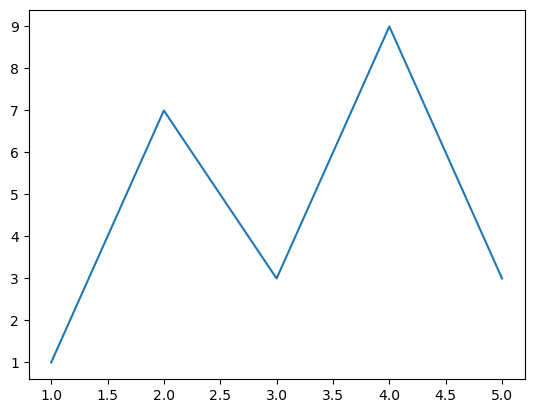

In [18]:
figure = plt.figure()
ax = figure.add_subplot(1,1,1)

x = [1,2,3,4,5]
y = [1,7,3,9,3]

ax.plot(x,y)
plt.show()

If we set this to the (1,2,2) position instead:

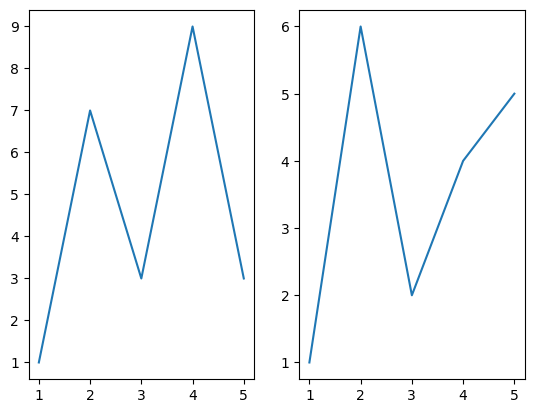

In [26]:
figure = plt.figure()
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)

x = [1,2,3,4,5]
y = [1,7,3,9,3]
z = [1,6,2,4,5]

ax1.plot(x,y)
ax2.plot(x,z)
plt.show()

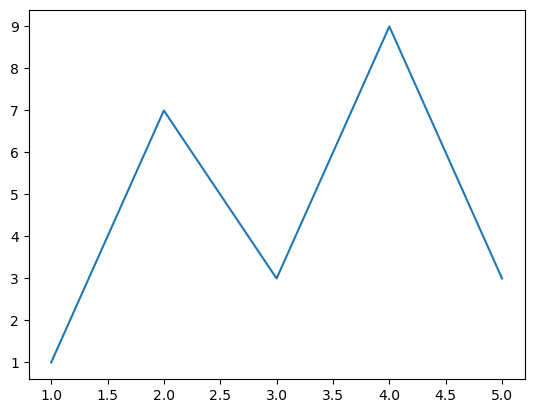

In [28]:
fig, ax = plt.subplots()

x = [1,2,3,4,5]
y = [1,7,3,9,3]

ax.plot(x,y)
plt.show()

If we'd like to work with more than one subplot, we simply specify the number of them in *subplots()*. Let's create 4.

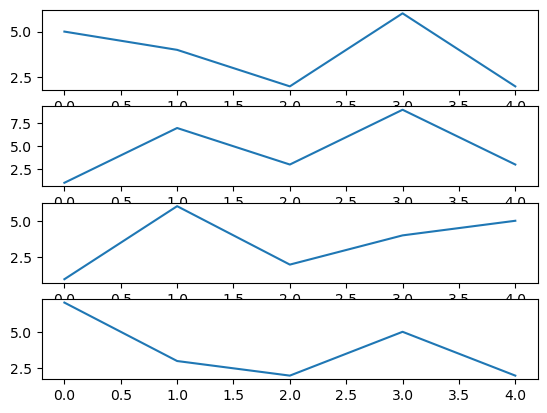

In [33]:
fix, ax = plt.subplots(4)

x = [5,4,2,6,2]
y = [1,7,3,9,3]
z = [1,6,2,4,5]
n = [7,3,2,5,2]

ax[0].plot(x)
ax[1].plot(y)
ax[2].plot(z)
ax[3].plot(n)

plt.show()

This creates four different *Axes* and plots them on different rows in the same column. We can also create them as separate objects with unique references, instead of as four objects in a Numpy array.

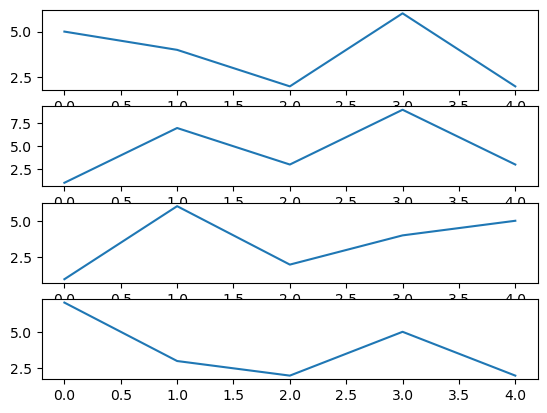

In [44]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)

ax1.plot(x)
ax2.plot(y)
ax3.plot(z)
ax4.plot(n)

plt.show()

Creating these 4 plots is a bit of a squeeze for the default figure size. However, all of this is customizable, which we'll now go into in a bit more detail.

### Basic Matplotlib Customization ###

A good portion of matplotlib's popularity comes from its customizability.

There's a ton that can be customized, and a ton of options for customization. We won't and can't go over all of them. Instead, we'll explore a few common operations, such as changing the figure and the font size.

Going back to our plot above, we note it's squeezed and it doesn't look good. Let's change the figure size to allow all four of these *Axes* objects to fit nicely.

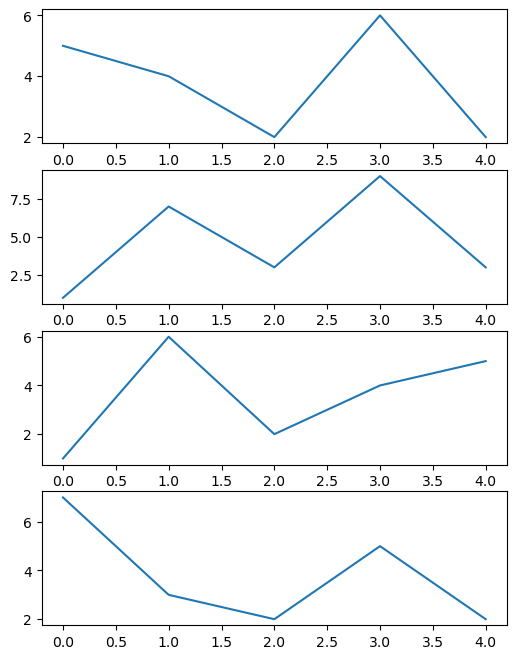

In [46]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(6,8))

ax1.plot(x)
ax2.plot(y)
ax3.plot(z)
ax4.plot(n)

plt.show()

This created a figure object that's 6 inches by 8 inches.

Instead of using the *figsize* argument, we can also set the height and width of a  figure. These can be done either via the *set()* function with the *figheight* and *figwidth* argument, or via the *set_figheight()* and *set_figwidth()* functions. Many ways to do the same thing. Let's see some examples:

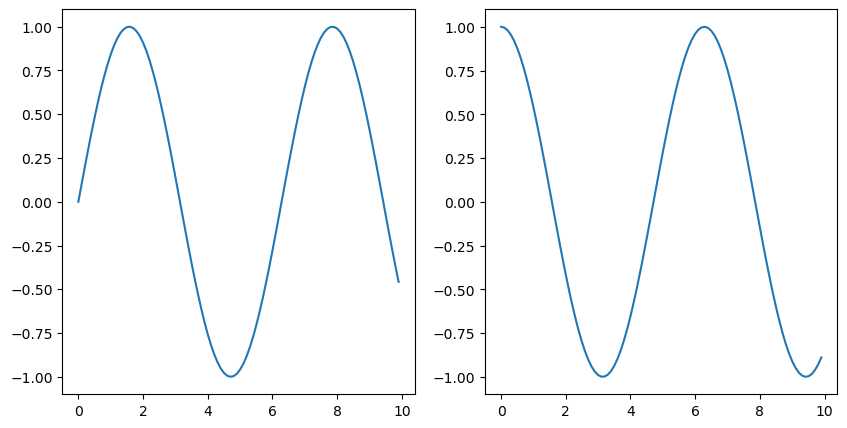

In [55]:
#Example using the set() function

x = np.arange(0,10,.1)
y = np.sin(x)
z = np.cos(x)

fig = plt.figure()

fig.set(figheight = 5, figwidth = 10)

# Adds subplot on index 1
ax1 = fig.add_subplot(121)
# Add subplot on index 2
ax2 = fig.add_subplot(122)

ax1.plot(x,y)
ax2.plot(x,z)

plt.show()

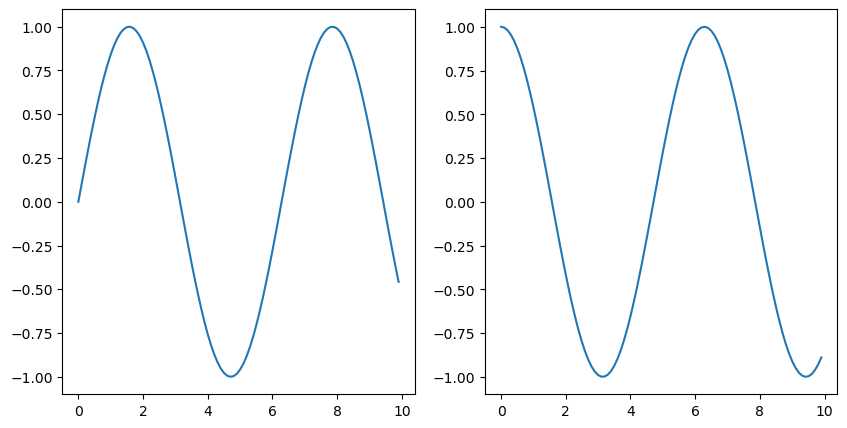

In [49]:
#Example using the set_figheight() and set_figwidth() functions.

x = np.arange(0,10,.1)
y = np.sin(x)
z = np.cos(x)

fig = plt.figure()

fig.set_figheight(5)
fig.set_figwidth(10)

# Adds subplot on index 1
ax1 = fig.add_subplot(121)
# Add subplot on index 2
ax2 = fig.add_subplot(122)

ax1.plot(x,y)
ax2.plot(x,z)

plt.show()

We can also use the *set_size_inches()* of the Figure object:

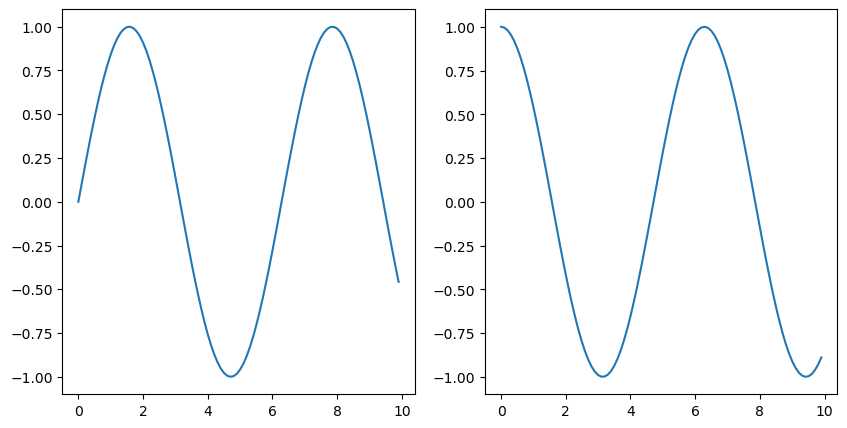

In [64]:
#Example using the set_size_inches() function.

x = np.arange(0,10,.1)
y = np.sin(x)
z = np.cos(x)

fig = plt.figure()

fig.set_size_inches(10,5)

# Adds subplot on index 1
ax1 = fig.add_subplot(121)
# Add subplot on index 2
ax2 = fig.add_subplot(122)

ax1.plot(x,y)
ax2.plot(x,z)

plt.show()

Please note there's no right or wrong approach here - matplotlib allows you to customize the figures in many ways, because it's anticipated you might want to change the parameters in many ways. Also, because it wasn't planned out very well, and the community has just kept adding different ways to do the same thing aligned with different structural goals.

Now let's talk a bit about text. Adding text to plots is a very common task. This text could be labels for axes, titles for plots, or even values of certain markers in the form of tooltips. We use text to give further context to the numerical and visual data on the plots.

One of the key classes here, unsurprisingly, in the *Text* class, which takes care of the parsing, storing, and drawing of textual data on plots, given certain coordinates. All the methods we'll use to add labels, titles, etc. rely on the functionality of this class.

For example, we we called:

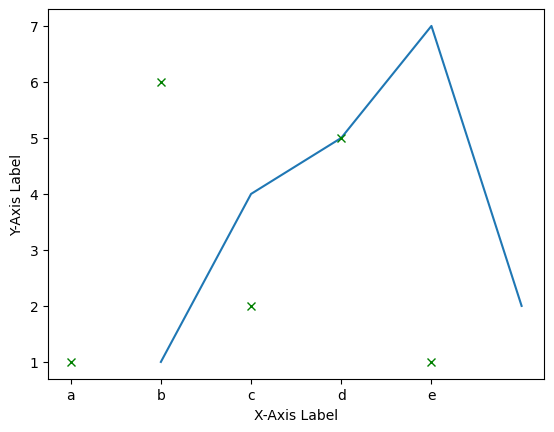

In [68]:
x_1 = [1,2,3,4,5]
y_1 = [1,4,5,7,2]
x_2 = ['a','b','c','d','e']
y_2 = [1,6,2,5,1]
plt.plot(x_1,y_1)
plt.plot(x_2,y_2, 'gx')
plt.ylabel('Y-Axis Label')
plt.xlabel('X-Axis Label')
plt.show()

The "xlabel" and "ylabel" functions constructed *Text* instances with default parameters. We'll rarely work manually with *Text* instances. Most of the time we'll be using helper functions that construct instances and assign them to appropriate positions.

Let's create a plot with some text:

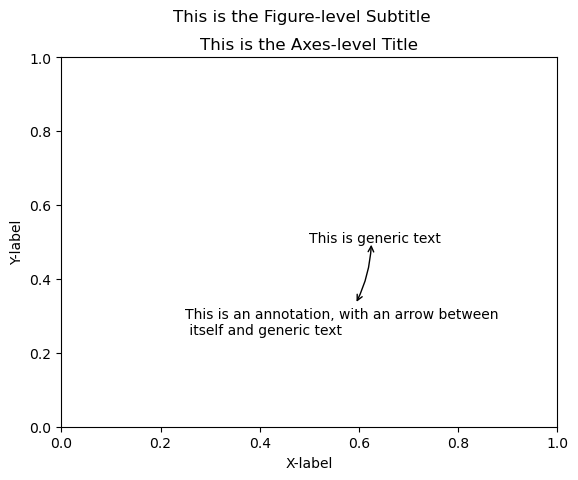

In [78]:
fig, ax = plt.subplots()

fig.suptitle('This is the Figure-level Subtitle')
ax.set_title('This is the Axes-level Title')
ax.set_xlabel('X-label')
ax.set_ylabel('Y-label')
ax.text(0.5,0.5, 'This is generic text')
ax.annotate('This is an annotation, with an arrow between \n itself and generic text',
            xy = (0.625, 0.5),
            xytext = (0.25,0.25),
            arrowprops=dict(arrowstyle='<->',
                            connectionstyle='arc3, rad=0.15'))
plt.show()

The *suptitle()* is added at the Figure-level, and is above all of its subplots. The *title* and labels can be set on the Axes-level, where each *Axes* can have separate titles and labels.

We did use the generic *text()* here. The *x* and *y* values refer to *actual* values on the plot - net percentages. By default, matplotlib creates a 1x1 plot, so in this case our text starts at the very center.

Finally, regarding the *annotate()* method, the *xy* tuple is the endpoint of the annotation - to where it's pointing, the *xytext* is the position of the text. The *arrowprops* accepts a dictionary with various properties you can use to customize the arrows. You can find details about the various options [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html).

Annotations are not the only way to provide observers with a way to differentiate and interpret the data on the plot. We commonly color-code certain variables, so they can easily be differentiated with a simple glance. You can add annotations for these - the green line is the age variable, the red line is the population variable, etc., but this can become unwieldy. Also, it's a bit weird to annotate features. Annotations are typically used to point out certain observations.

To point out features, we typically use a legend, which could have, for example, a list of colors and a list of labels for these colors.

Let's first create a simple plot with two variables, each with a different color.

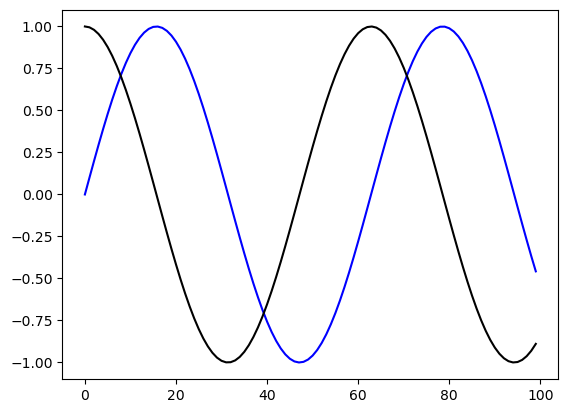

In [82]:
fig, ax = plt.subplots()

x = np.arange(0,10,.1)
y = np.sin(x)
z = np.cos(x)

ax.plot(y, color = 'blue')
ax.plot(z, color = 'black')

plt.show()

Next, let's add a legend to this plot. First, we'll want to label our variables so we can refer to them in the legend. Once this is done, all we need to do is call the legend() function on the *Axes* instance.

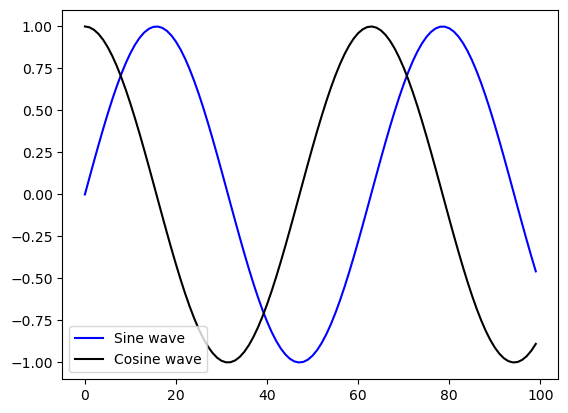

In [87]:
fig, ax = plt.subplots()

x = np.arange(0,10,.1)
y = np.sin(x)
z = np.cos(x)

ax.plot(y, color = 'blue', label ='Sine wave')
ax.plot(z, color = 'black', label='Cosine wave')
leg = ax.legend()

plt.show()

Matplotlib does its best to fit the legend in a place where it'll obstruct the least of the plot.

But, suppose we don't like where the legend has been placed. Let's place it somewhere else. Specifically, let's place it in the top-right corner, and let's remove the border.

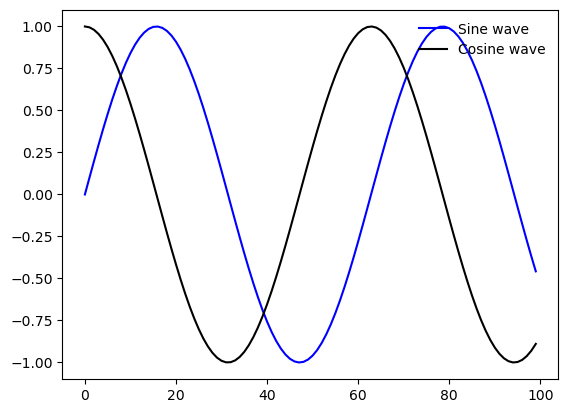

In [90]:
fig, ax = plt.subplots()

x = np.arange(0,10,.1)
y = np.sin(x)
z = np.cos(x)

ax.plot(y, color = 'blue', label ='Sine wave')
ax.plot(z, color = 'black', label='Cosine wave')
leg = ax.legend(loc='upper right', frameon=False)

plt.show()

Meh, that's not great. Let's maybe stretch out our figure a bit.

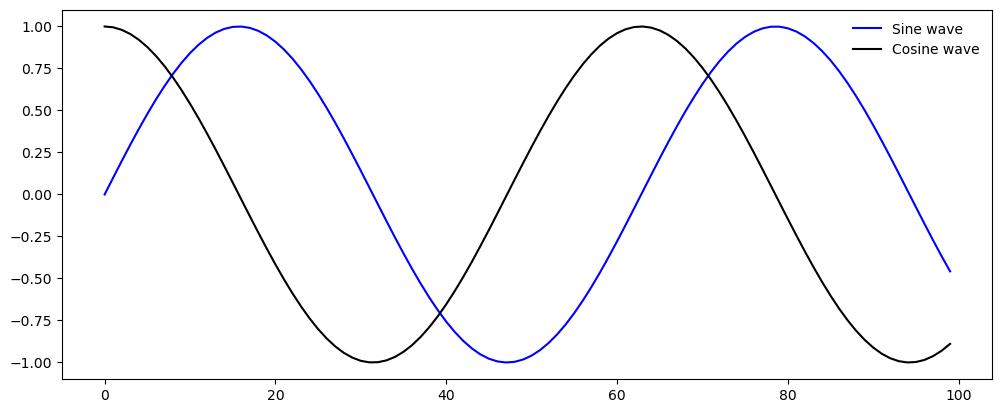

In [95]:
fig, ax = plt.subplots()

fig.set_figwidth(12)

x = np.arange(0,10,.1)
y = np.sin(x)
z = np.cos(x)

ax.plot(y, color = 'blue', label ='Sine wave')
ax.plot(z, color = 'black', label='Cosine wave')
leg = ax.legend(loc='upper right', frameon=False)

plt.show()

Nice.

Sometimes, it's tricky to place the legend within the border box of a plot. There can be a lot going on within the plot! In these cases, you can place the legend *outside* the axes. This is done via the *bbox_to_anchor* argument, which specifies where we want to anchor the legend.

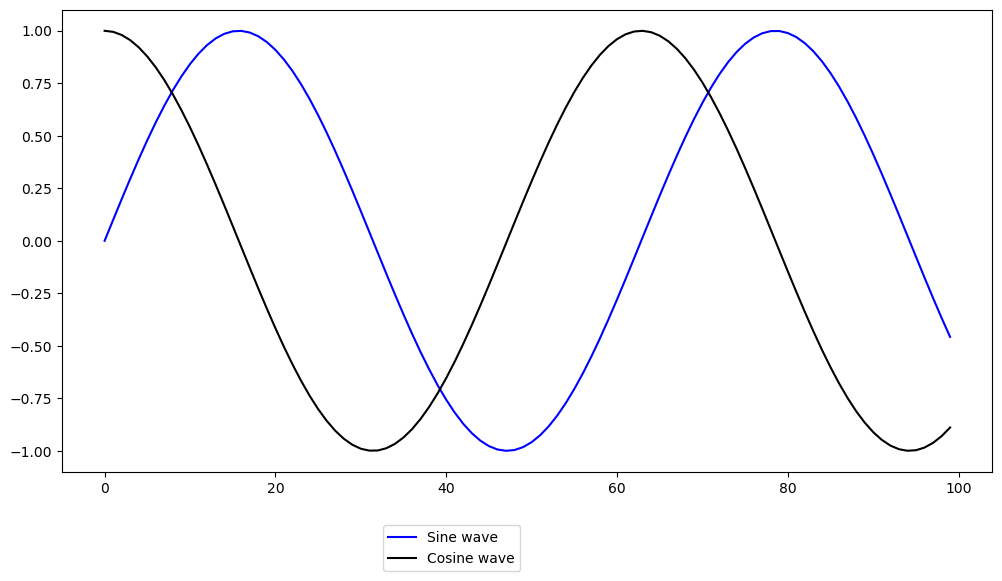

In [110]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(0,10,.1)
y = np.sin(x)
z = np.cos(x)

ax.plot(y, color = 'blue', label ='Sine wave')
ax.plot(z, color = 'black', label='Cosine wave')
leg = ax.legend(bbox_to_anchor=(0.5, -0.10))

plt.show()

There are a few other parameters we can specify in the legend call as well. For example, the number of columns (*ncol*). If we set this to $2$ we would get:

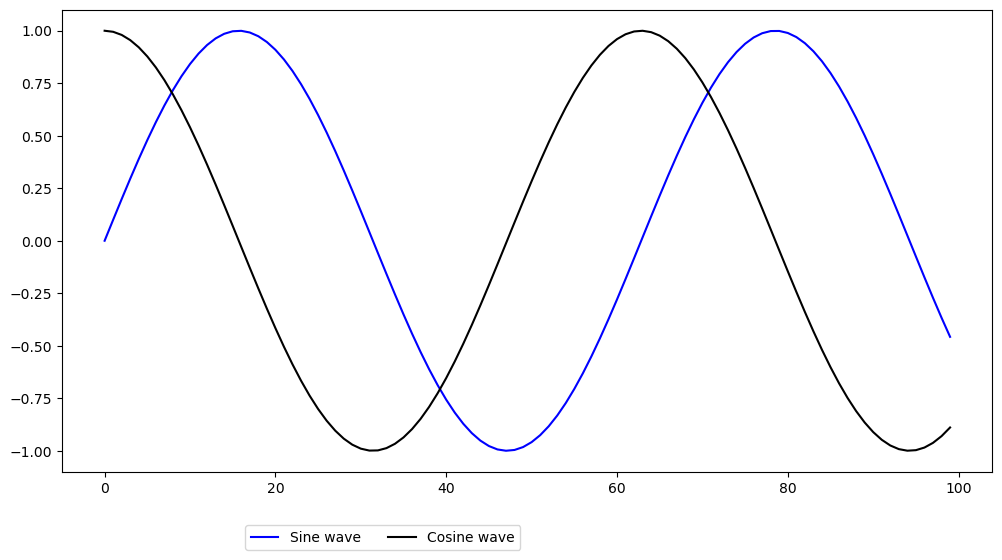

In [113]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(0,10,.1)
y = np.sin(x)
z = np.cos(x)

ax.plot(y, color = 'blue', label ='Sine wave')
ax.plot(z, color = 'black', label='Cosine wave')
leg = ax.legend(bbox_to_anchor=(0.5, -0.10), ncol=2)

plt.show()

This doesn't look great. We can center it by setting "loc = center", which will center the bounding box around its location.

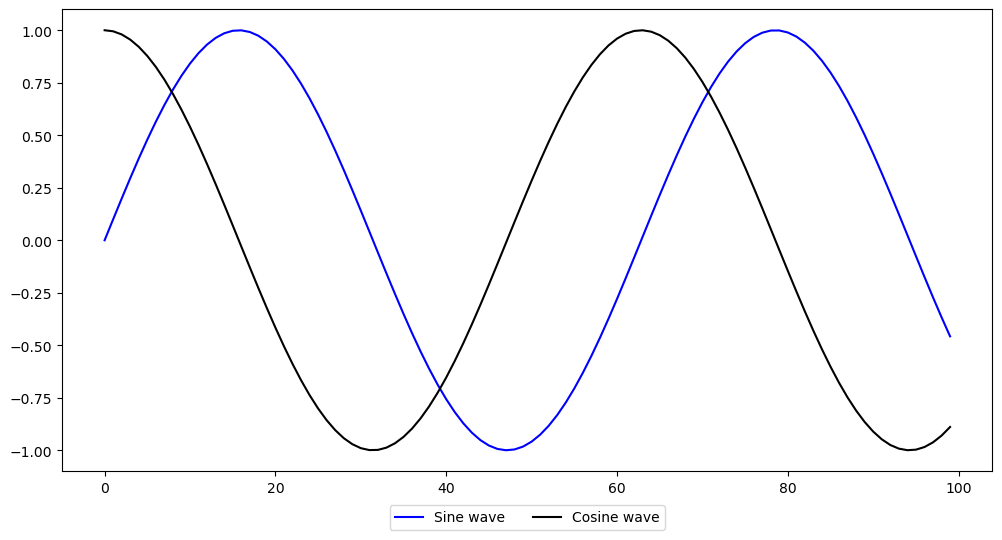

In [116]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(0,10,.1)
y = np.sin(x)
z = np.cos(x)

ax.plot(y, color = 'blue', label ='Sine wave')
ax.plot(z, color = 'black', label='Cosine wave')
leg = ax.legend(loc='center', bbox_to_anchor=(0.5, -0.10), ncol=2)

plt.show()

Nice.

Let's add a title to our legend, and make the font size larger.

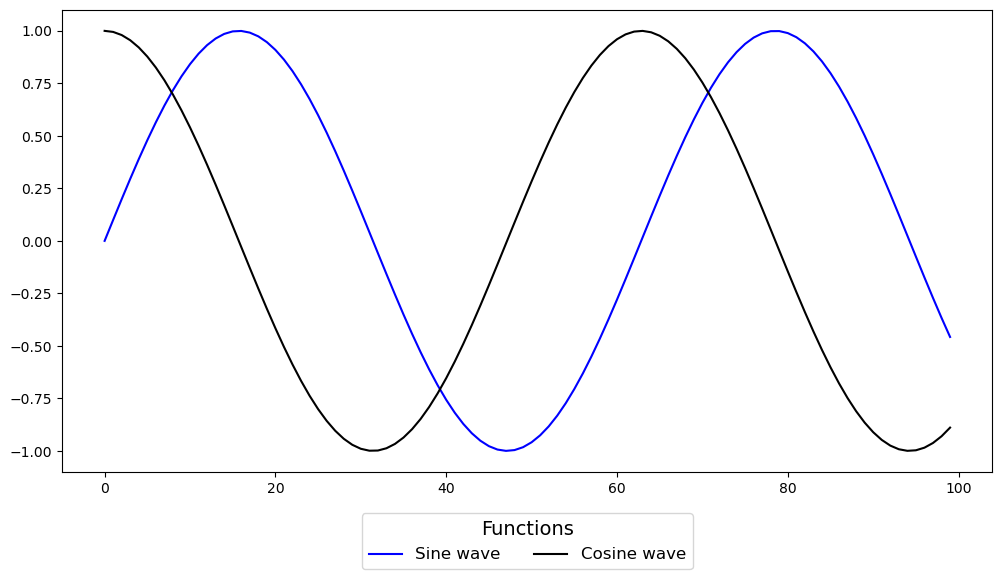

In [127]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(0,10,.1)
y = np.sin(x)
z = np.cos(x)

ax.plot(y, color = 'blue', label ='Sine wave')
ax.plot(z, color = 'black', label='Cosine wave')
leg = ax.legend(title='Functions', fontsize=12, title_fontsize=14, loc='center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.show()

Here, we changed the fort size for the legend and for the legend title. We can change all the font sizel by modifying the "runtime configuration parameters", or rcParams, specifically "font.size".

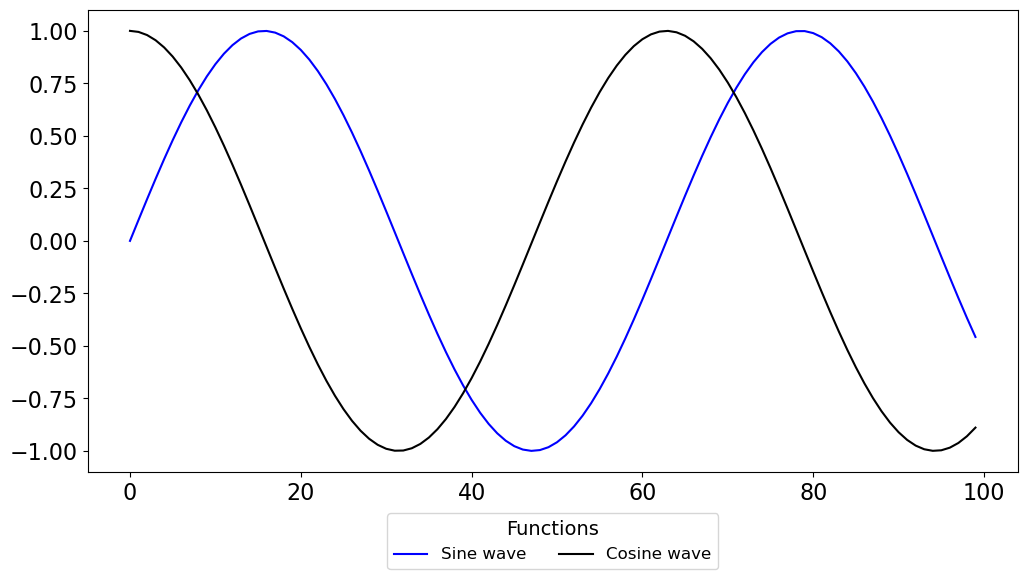

In [150]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(0,10,.1)
y = np.sin(x)
z = np.cos(x)

plt.rcParams['font.size'] = '16'

ax.plot(y, color = 'blue', label ='Sine wave')
ax.plot(z, color = 'black', label='Cosine wave')
leg = ax.legend(title='Functions', fontsize=12, title_fontsize=14, loc='center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.show()

We'll talk more about other configuration parameters next time.